# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The state for the second agent looks like:', states[1])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]
The state for the second agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.4669857  -1.5         0.          0.
 -6.83172083  6.          0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
#for i in range(5):                                         # play game for 5 episodes
#    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#    states = env_info.vector_observations                  # get the current state (for each agent)
#    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#    while True:
#        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#        next_states = env_info.vector_observations         # get next state (for each agent)
#        rewards = env_info.rewards                         # get reward (for each agent)
#        dones = env_info.local_done                        # see if episode finished
#        scores += env_info.rewards                         # update the score (for each agent)
#        states = next_states                               # roll over states to next time step
#        if np.any(dones):                                  # exit loop if episode finished
#            break
#    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

# Collaboration and Competition - Student's project work

The following sections show my code and results from my work on this project.
In general, my code is very similar to my solution of the second project, the Reacher environment with 20 agents.


I have implemented an Actor-Critic network with a DDPG algorithm:

Implementation follows the standard actor network implementation as described in the Udacity course videos regarding the DDPG algorithms. i.e. the bipedal walker or the pendulum exercises.

 - Actor neural network with three fully connected layers with sizes of: 24 (states) -> 256 (hidden) -> 128 (hidden) -> 2 (action value)
 - Critic neural network with three fully connected layers with sizes of: 24 (states) -> 256 (hidden) + 2 (action values) -> 128 (hidden) -> 1 (Q-value)

Both neural network architectures implement:

 - Linear fully connected layers: https://pytorch.org/docs/master/generated/torch.nn.Linear.html
 - Leaky rectangular linear unit activation function: https://pytorch.org/docs/stable/nn.html
 - Dropout between fully connected layersfor regularization: https://pytorch.org/docs/master/generated/torch.nn.Dropout.html
 - Batch Normalization on input to regularize input data: https://pytorch.org/docs/master/generated/torch.nn.BatchNorm1d.html

I have implemented an agent with:

 - Standard Deep Deterministic Policy Gradient Algorithm
 - Standard experience replay with random sampling
 - Standard Ornstein-Uhlenbeck process for noise on action value
 - Reduction of noise level depending on progress of simulation
 - Standard Mean-squared-error loss functions
 - Adam optimizer: https://pytorch.org/docs/stable/_modules/torch/optim/adam.html#Adam
 - Several learning passes per step of agent to improve learning and convergence

Note that these implementations give room for many more advanced changes, which of some will be discussed in the Final conclusions section.

I evolve the until the mean score of the last 100 episodes reachses a value of greater than 0.5. Then the training process is stopped and the result are outputted.


### Import all necessary packages at once

In [7]:
# Import packages for the data processing before and after simulations
import time
import pickle
import math
import datetime
import random
import sys
import copy
import numpy as np
from collections import namedtuple, deque
import matplotlib.pyplot as plt
%matplotlib inline

# Import from PyTorch for neural network implementation
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Import to keep instance active while training on GPU
import workspace_utils
from workspace_utils import active_session

### Setting of variables for the neural network, training algorithms and unity environments

In [8]:
BUFFER_SIZE = int(1e6)     # replay buffer size
BATCH_SIZE = 256           # minibatch size
GAMMA = 0.99               # discount factor
TAU = 0.001                # for soft update of target parameters
LR_ACTOR = 0.0001          # learning rate for actor network
LR_CRITIC = 0.001          # learning rate for critic network

FC_SIZE = 32               # number of neurons in layer of neural network
P_DROPOUT = 0.0            # dropout probability for neurons and network regularization

ACTION_SIZE = brain.vector_action_space_size # number of actions
STATE_SIZE = states.shape[1]    # number of states
N_AGENTS = len(env_info.agents) # number of agents

N_EPISODES = 5000          # number of maximum episodes for training

ENV_SOLVED = 0.5           # average score of agent to consider environment solved
RANDOM_SEED = 3            # seed integer for random number generator

NUM_PASSES = 8             # Number of learning passes per step

NOISE_COEFF = 0.5          # Weighting coefficient for noise process

### Check if training on GPU is possible, else use CPU

In [9]:
# If GPU is available use for training otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

if device == "cpu":
    print("Available: CPU only")
else:
    print("Available: GPU cuda")

Available: GPU cuda


### Implementation of noise process added to actions of agent

Implementation follows the standard noise Ornstein-Uhlenbeck process as described in the Udacity course videos regarding the DDPG algorithms. i.e. the bipedal walker or the pendulum exercises.

In [10]:
# Ornstein-Uhlenbeck stochastic noise process
class OUNoise:

    def __init__(self):

        self.theta = 0.15
        self.sigma = 0.1
        self.size = (N_AGENTS, ACTION_SIZE)
        self.mu = np.zeros(self.size) # mu = 0.0
        self.reset()

    # Reset internal state to mean
    def reset(self):

        self.state = copy.copy(self.mu)

    # Update internal state and generate noise sample
    def sample(self):

        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for _ in range(len(x))])
        self.state = x + dx
        
        return self.state

### Implementation of experience replay buffer

Implementation follows the standard replay buffer implementation as described in the Udacity course videos regarding the DDPG algorithms. i.e. the bipedal walker or the pendulum exercises.

In [11]:
class ReplayBuffer:

    def __init__(self):

        self.memory = deque(maxlen = BUFFER_SIZE)
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(RANDOM_SEED)
    
    # Add an experience to the memory
    def add(self, state, action, reward, next_state, done):

        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    # Randomly sample experiences from the memory
    def sample(self):

        # Randomly draw a sample of size BATCH_SIZE
        experiences = random.sample(self.memory, k=BATCH_SIZE)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    # Calculate length of memory
    def __len__(self):

        return len(self.memory)

### Initialization of weights in hidden layer

Implementation follows the standard weight implementation as described in the Udacity course videos regarding the DDPG algorithms. i.e. the bipedal walker or the pendulum exercises.

In [12]:
def hidden_init(layer):
    
    fan_in = layer.weight.data.size()[0]
    lim = 1.0 / np.sqrt(fan_in)
    
    return (-lim, lim)

### Actor network for Actor-Critic-setup

Implementation follows the standard actor network implementation as described in the Udacity course videos regarding the DDPG algorithms. i.e. the bipedal walker or the pendulum exercises.

Standard neural network with three fully connected layers with sizes of: 24 (states) -> 256 (hidden) -> 128 (hidden) -> 2 (action value)

 - Linear fully connected layers: https://pytorch.org/docs/master/generated/torch.nn.Linear.html
 - Leaky rectangular linear unit activation function: https://pytorch.org/docs/stable/nn.html
 - Dropout between fully connected layersfor regularization: https://pytorch.org/docs/master/generated/torch.nn.Dropout.html
 - Batch Normalization on input to regularize input data: https://pytorch.org/docs/master/generated/torch.nn.BatchNorm1d.html

In [13]:
class Actor(nn.Module):

    def __init__(self):

        super(Actor, self).__init__()
        
        self.seed = torch.manual_seed(RANDOM_SEED)
        
        self.fc1 = nn.Linear(STATE_SIZE, 8*FC_SIZE)
        self.fc2 = nn.Linear(8*FC_SIZE, 4*FC_SIZE)
        self.fc3 = nn.Linear(4*FC_SIZE, ACTION_SIZE)
        
        self.dropout = nn.Dropout(P_DROPOUT)
        self.bn = nn.BatchNorm1d(STATE_SIZE)
        
        self.reset_parameters()

    def reset_parameters(self):
        
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)
        #self.fc1.bias.data.fill_(np.random.uniform())
        #self.fc2.bias.data.fill_(np.random.uniform())
        #self.fc3.bias.data.fill_(np.random.uniform())

    def forward(self, state):

        x = self.bn(state)
            
        x = F.leaky_relu(self.fc1(x))
        
        x = F.leaky_relu(self.fc2(x))
        x = self.dropout(x) # dropout regularization
        
        result = torch.tanh(self.fc3(x)) # tanh to yield continous value between -1.0 and 1.0
        return result

### Critic network for Actor-Critic-setup

Implementation follows the standard critic network implementation as described in the Udacity course videos regarding the DDPG algorithms. i.e. the bipedal walker or the pendulum exercises.

Standard neural network with three fully connected layers with sizes of: 24 (states) -> 256 (hidden) + 2 (action values) -> 128 (hidden) -> 1 (Q-value)

 - Linear fully connected layers: https://pytorch.org/docs/master/generated/torch.nn.Linear.html
 - Leaky rectangular linear unit activation function: https://pytorch.org/docs/stable/nn.html
 - Dropout between fully connected layersfor regularization: https://pytorch.org/docs/master/generated/torch.nn.Dropout.html
 - Batch Normalization on input to regularize input data: https://pytorch.org/docs/master/generated/torch.nn.BatchNorm1d.html

Note, that at the first hidden layer, the action values are added into the network.

In [14]:
class Critic(nn.Module):

    def __init__(self):

        super(Critic, self).__init__()
        
        self.seed = torch.manual_seed(RANDOM_SEED)
        
        self.fc1 = nn.Linear(STATE_SIZE, 8*FC_SIZE)
        self.fc2 = nn.Linear(8*FC_SIZE + ACTION_SIZE, 4*FC_SIZE)
        self.fc3 = nn.Linear(4*FC_SIZE, 1)
        
        self.dropout = nn.Dropout(P_DROPOUT)
        self.bn = nn.BatchNorm1d(STATE_SIZE)

        self.reset_parameters()

    def reset_parameters(self):
        
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)
        #self.fc1.bias.data.fill_(np.random.uniform())
        #self.fc2.bias.data.fill_(np.random.uniform())
        #self.fc3.bias.data.fill_(np.random.uniform())

    def forward(self, state, action):
        
        x = self.bn(state)
        
        x = F.leaky_relu(self.fc1(x))

        x = torch.cat((x, action), dim=1) # merge action vector into network

        x = F.leaky_relu(self.fc2(x))
        x = self.dropout(x) # dropout regularization
        
        result = self.fc3(x) # no activation as we need a real Q value
        return result

### Implementation of agent

Implementation of agent follows the standard implementation of DDPF as described in the Udacity course videos regarding the Bipedal Walker or the Pendulum and given in their corresponding Jupyter Notebooks.

Standard implementation using:

 - Standard Actor Critic network with three fully connected layers, leaky rectangular linear unig and dropout regularization
 - Standard Deep Deterministic Policy Gradient Algorithm
 - Standard experience replay with random sampling
 - Standard Ornstein-Uhlenbeck process for noise on action value
 - Reduction of noise level with progress of simulation
 - Standard Mean-squared-error loss functions
 - Adam optimizer: https://pytorch.org/docs/stable/_modules/torch/optim/adam.html#Adam
 - Multiple learning passes (drawn from buffer) on every step

In [15]:
class Agent():
    
    def __init__(self):

        self.seed = random.seed(RANDOM_SEED)

        # Actor Network (w/ Target Network)
        self.actor_local = Actor().to(device)
        self.actor_target = Actor().to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)

        # Critic Network (w/ Target Network)
        self.critic_local = Critic().to(device)
        self.critic_target = Critic().to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC)

        # Replay memory
        self.memory = ReplayBuffer()
        
        # Noise process
        self.noise = OUNoise()
        
    # Perform step
    def step(self, state, action, reward, next_state, done):

        self.memory.add(state, action, reward, next_state, done)
            
        # Learn, if enough samples are available in memory
        if len(self.memory) > BATCH_SIZE:
            for _ in range(NUM_PASSES):
                experiences = self.memory.sample()
                self.learn(experiences)

    # Reset noise
    def reset(self):
        self.noise.reset()
                
    # Choose action for agent according to given policy
    def act(self, state, noco = NOISE_COEFF):

        state = torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        
        action += noco * self.noise.sample()
        
        self.actor_local.train()
        
        return np.clip(action, -1, 1)

    # Learn from experiences
    def learn(self, experiences):

        states, actions, rewards, next_states, dones = experiences

        # Get next actions from actor and corresponding Q from critic
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)
        
        # Calculate target Q
        Q_targets = rewards + (GAMMA * Q_targets_next * (1.0 - dones))
        
        # Get expected Q
        Q_expected = self.critic_local(states, actions)
        
        # Standard mean-sqaured-error loss function
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        
        # Reset the gradients
        self.critic_optimizer.zero_grad()
        # Perform backpropagation
        critic_loss.backward()
        # Optimize weights
        self.critic_optimizer.step()

        
        # Compute loss function for actor
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()

        # Reset the gradients
        self.actor_optimizer.zero_grad()
        # Perform backpropagation
        actor_loss.backward()
        # Optimize weights
        self.actor_optimizer.step()

        # Update networks
        self.soft_update(self.critic_local, self.critic_target)
        self.soft_update(self.actor_local, self.actor_target)
        
    def soft_update(self, local_model, target_model):

        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(TAU * local_param.data + (1.0 - TAU) * target_param.data)

### Training of agent with deep deterministic policy gradient

Algorithm loops over a number of eposiodes with maximum of N_EPISODES=2500, each for a time until the ball has dropped onto the ground:

 - It is possible to output the weights every 50 episodes
 - Every 10 episodes the weights are temporary written into a file
 - The environment is considered solved if the average score (of all agents) is greater than ENV_SOLVED=0.50 for the last 100 episodes.
 - If the environment is solved, the training is stopped and the final weights are written in a file
 - Noise level decays exponentially with time

In [16]:
def ddpg():
    
    scores_window = deque(maxlen = 100)
    scores_max = []
    
    for i_episode in range(1, N_EPISODES + 1):
        
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get current state
        scores = np.zeros(N_AGENTS)                            # reset scores
        agent.reset()
        
        noco = NOISE_COEFF * (0.996 ** np.float(i_episode))
        
        while True:
   
            actions = agent.act(states, noco)                  # select an action (for each agent)
            
            env_info = env.step(actions)[brain_name]           # send the action to the environment
            
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished (for each agent)
            
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done)
            
            scores += rewards                                  # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            
            if np.any(dones):                                  # exit loop if episode finished
                break

        scores_max.append(np.max(scores))                      # episode reward as maximum score of both agents
        scores_window.append(scores_max)                       # save most recent score

        if i_episode % 1 == 0:
            print('\rEpisode {}\tCurrent Score: {:.4f}\tAverage Score: {:.4f}\tNoise: {:.4f}'.format(i_episode, np.max(scores), np.mean(scores_window), noco))
        
        if i_episode % 10 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_temp.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_temp.pth')
            
            f = open('scores_temp.pckl', 'wb')
            
            # Old version containing bug
            #pickle.dump(scores, f)
            
            # Fixed version
            pickle.dump(scores_max, f)
            
            f.close()

        # Output temporary weights file every 50 episodes.
        #if i_episode % 50 == 0:
        #    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        #    torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_temp.pth')
        #    torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_temp.pth')
        
        # Output final weights after environment is solved
        if np.mean(scores_window) > ENV_SOLVED:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.4f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break

    # Old version containing bug
    #return scores

    # Fixed version
    return scores_max


In [17]:
if device == "cpu":
    print("Running on CPU.")
else:
    print("Running on GPU.")

Running on GPU.


### Main Loop

In the following cell all the previous implementations come into play. The agent architecture is subsequently trained and the weights of the final solution as well as the time evolution of average reward are stored into files.

In [18]:
print("\nTraining Loop:\n")

agent = Agent()

with active_session():
    scores = ddpg()

f = open('scores.pckl', 'wb')
pickle.dump(scores, f)
f.close()


Training Loop:

Episode 1	Current Score: 0.0000	Average Score: 0.0000	Noise: 0.4980
Episode 2	Current Score: 0.0000	Average Score: 0.0000	Noise: 0.4960
Episode 3	Current Score: 0.0000	Average Score: 0.0000	Noise: 0.4940
Episode 4	Current Score: 0.0000	Average Score: 0.0000	Noise: 0.4920
Episode 5	Current Score: 0.0000	Average Score: 0.0000	Noise: 0.4901
Episode 6	Current Score: 0.0000	Average Score: 0.0000	Noise: 0.4881
Episode 7	Current Score: 0.0000	Average Score: 0.0000	Noise: 0.4862
Episode 8	Current Score: 0.0000	Average Score: 0.0000	Noise: 0.4842
Episode 9	Current Score: 0.0000	Average Score: 0.0000	Noise: 0.4823
Episode 10	Current Score: 0.0000	Average Score: 0.0000	Noise: 0.4804
Episode 11	Current Score: 0.0000	Average Score: 0.0000	Noise: 0.4784
Episode 12	Current Score: 0.0000	Average Score: 0.0000	Noise: 0.4765
Episode 13	Current Score: 0.0000	Average Score: 0.0000	Noise: 0.4746
Episode 14	Current Score: 0.0000	Average Score: 0.0000	Noise: 0.4727
Episode 15	Current Score: 

### Bug-fixing of return scores - Start
### ----------------------------------------

Due to a bug in my ddpg() function, the loop did not return me a valid time-series of the scores (i.e. i returned the "scores" variable instead of the "scores_max" variable.
Therefore, I extracted the time-series of the scores from the output of the console in the cell above and put them as an array here again.
All the results of the trained agents are valid and correct.
This is just a quick workaround for creating the final plot!

In [24]:
# Extraction of values from log-output

# For values see the cell above

scores = np.array([0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1000,0.0000,0.0900,0.0000,0.0000,0.0900,0.0000,0.0000,0.0000,0.0900,0.0900,0.1000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1000,0.0900,0.0000,0.0900,0.0000,0.0000,0.0900,0.0900,0.1000,0.1000,0.1000,0.1000,0.0000,0.0000,0.1000,0.3000,0.1000,0.1000,0.0000,0.0000,0.0000,0.0900,0.2000,0.1000,0.1000,0.1000,0.1000,0.2000,0.0000,0.1000,0.0900,0.2000,0.1000,0.2000,0.1000,0.1000,0.2000,0.2900,0.7000,0.1000,0.0000,0.2000,0.1000,0.5000,0.0000,0.1000,0.0000,0.3000,0.0000,0.0000,0.0000,0.0000,0.2000,0.2000,0.1000,0.1000,0.1000,0.2000,0.1000,0.2000,0.1000,0.0900,0.1000,0.4000,0.1000,0.4000,0.3000,0.0900,0.1000,0.1000,0.2000,0.1000,0.1000,0.1000,0.1000,0.1000,0.1000,0.2000,0.3000,0.1900,0.1000,0.1000,0.1000,0.2000,0.2000,0.2000,0.1000,0.1000,0.1000,0.1000,0.6000,0.4000,0.2000,0.1000,0.2000,0.4000,0.4000,0.2000,0.2000,0.2000,0.1000,0.3000,0.1000,0.3000,0.1000,0.2000,0.4000,0.2000,0.1000,0.1000,1.1000,0.1000,0.1000,0.1000,0.1000,0.5000,0.1000,0.9000,1.1000,0.0000,1.7000,0.4000,0.1000,0.1000,0.1000,0.2000,0.3000,0.1000,0.2000,0.2000,0.7000,0.9000,0.1000,0.2000,0.4000,0.2000,2.6000,0.1000,1.2000,0.9000,0.6000,0.9000,0.1000,2.6000,0.0000,0.3000,0.3000,0.5000,2.6000,0.2000,0.1000,0.5000,1.2000,0.3000,0.1900,0.3000,1.5000,2.6000,1.1000,0.4000,1.1000,0.2000,2.6000,0.7000,0.1000,0.2000,0.9000,1.1000,0.8000,0.0000,1.3000,0.1000,0.1000,0.2000,0.1000,0.6000,0.1000,0.1000,0.1000,0.4000,0.2000,0.3000,0.1000,0.3000,1.0000,0.2900,2.6000,2.6000,0.1000,0.4000,1.1000,0.7000,1.2000,2.5000,0.2000,0.4900,0.8000,0.1000,0.2000,0.5000,0.4000,1.4000,0.2000,0.2000,0.3000,0.1000,0.3000,0.1000,0.2000,0.1000,0.6000,0.1000,0.5000,0.5000,0.2000,0.7000,2.6000,0.9000,2.6000,2.4000,0.4000,2.6000,2.6000,2.6000,1.3900,0.7000,0.2000,0.5000,0.2000,0.2000,0.4000,0.1000,0.6000,0.3000,0.4000,0.1000,0.6000,0.3000,1.0000,0.7000,1.1000,0.6000,0.3000,2.6000,2.6000,1.1900,2.4000,0.2000,2.6000,0.4000,0.4000,2.6000,2.7000,1.0000,2.6000,0.9000,2.6000,2.7000,2.6000,2.6000,2.6000,0.2000,2.6000,1.7000,1.2000,1.1000,0.1000,0.1000,0.5000,0.5000,1.0000,2.6000,0.1000,2.6000,0.6900,2.6000,0.0000,2.3000,0.7000,2.4000,0.1000,0.1000,0.1000,0.1000,0.1000,0.1000,2.6000,0.3000,0.2000,2.6000,0.0000,0.1000,2.6000,0.0000,0.8900,2.6000,1.2000,2.6000,0.9000,1.5000,1.3000,0.7000,2.6000,0.0000,2.6000,2.6000,1.9000,1.6000,1.3000,0.6000,0.5000,1.1000,0.4900,0.4900,2.5000])
scores_avg = np.array([0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0029,0.0028,0.0051,0.0050,0.0049,0.0070,0.0068,0.0067,0.0065,0.0084,0.0102,0.0122,0.0119,0.0117,0.0114,0.0112,0.0110,0.0108,0.0106,0.0104,0.0102,0.0100,0.0098,0.0097,0.0095,0.0093,0.0092,0.0090,0.0089,0.0088,0.0086,0.0085,0.0084,0.0082,0.0081,0.0080,0.0079,0.0078,0.0077,0.0076,0.0075,0.0074,0.0073,0.0072,0.0071,0.0070,0.0069,0.0068,0.0067,0.0067,0.0066,0.0065,0.0064,0.0064,0.0063,0.0062,0.0062,0.0061,0.0071,0.0080,0.0079,0.0088,0.0087,0.0086,0.0094,0.0102,0.0111,0.0120,0.0128,0.0137,0.0135,0.0134,0.0142,0.0169,0.0176,0.0184,0.0182,0.0180,0.0179,0.0185,0.0201,0.0208,0.0215,0.0221,0.0228,0.0243,0.0240,0.0247,0.0252,0.0266,0.0272,0.0286,0.0291,0.0297,0.0310,0.0330,0.0381,0.0386,0.0383,0.0395,0.0399,0.0433,0.0430,0.0434,0.0431,0.0449,0.0446,0.0443,0.0440,0.0437,0.0448,0.0458,0.0462,0.0466,0.0469,0.0479,0.0483,0.0493,0.0496,0.0499,0.0502,0.0524,0.0527,0.0549,0.0565,0.0567,0.0570,0.0572,0.0581,0.0584,0.0586,0.0589,0.0591,0.0593,0.0596,0.0604,0.0618,0.0626,0.0628,0.0630,0.0632,0.0640,0.0647,0.0655,0.0657,0.0659,0.0661,0.0663,0.0692,0.0710,0.0717,0.0718,0.0725,0.0743,0.0760,0.0766,0.0773,0.0779,0.0780,0.0792,0.0793,0.0804,0.0805,0.0811,0.0827,0.0833,0.0834,0.0835,0.0885,0.0885,0.0886,0.0886,0.0887,0.0907,0.0907,0.0946,0.0993,0.0989,0.1064,0.1078,0.1077,0.1077,0.1076,0.1081,0.1089,0.1089,0.1093,0.1097,0.1124,0.1159,0.1158,0.1162,0.1174,0.1178,0.1286,0.1285,0.1332,0.1365,0.1385,0.1417,0.1415,0.1519,0.1513,0.1519,0.1526,0.1540,0.1641,0.1643,0.1640,0.1654,0.1696,0.1702,0.1702,0.1708,0.1761,0.1858,0.1894,0.1903,0.1939,0.1939,0.2033,0.2053,0.2049,0.2048,0.2075,0.2110,0.2132,0.2124,0.2165,0.2161,0.2157,0.2156,0.2152,0.2166,0.2162,0.2157,0.2153,0.2160,0.2159,0.2162,0.2158,0.2161,0.2190,0.2192,0.2277,0.2362,0.2357,0.2363,0.2394,0.2410,0.2444,0.2522,0.2521,0.2529,0.2548,0.2542,0.2541,0.2549,0.2554,0.2593,0.2591,0.2589,0.2590,0.2585,0.2586,0.2581,0.2579,0.2574,0.2585,0.2580,0.2588,0.2596,0.2594,0.2608,0.2684,0.2704,0.2779,0.2847,0.2851,0.2925,0.2998,0.3071,0.3105,0.3117,0.3113,0.3119,0.3116,0.3112,0.3115,0.3109,0.3118,0.3117,0.3120,0.3113,0.3122,0.3122,0.3143,0.3154,0.3178,0.3186,0.3186,0.3254,0.3321,0.3346,0.3407,0.3403,0.3470,0.3471,0.3473,0.3538,0.3606,0.3625,0.3689,0.3704,0.3768,0.3835,0.3898,0.3961,0.4023,0.4017,0.4079,0.4115,0.4138,0.4157,0.4148,0.4139,0.4142,0.4144,0.4160,0.4220,0.4211,0.4271,0.4278,0.4337,0.4325,0.4376,0.4383,0.4435,0.4426,0.4417,0.4408,0.4399,0.4390,0.4381,0.4438,0.4434,0.4428,0.4484,0.4473,0.4464,0.4519,0.4508,0.4519,0.4574,0.4594,0.4648,0.4660,0.4686,0.4707,0.4713,0.4767,0.4755,0.4808,0.4862,0.4897,0.4925,0.4945,0.4948,0.4948,0.4963,0.4962,0.4962,0.5012])

# Saving of scores into file

f = open('scores.pckl', 'wb')
pickle.dump(scores, f)
f.close()

f = open('scores_avg.pckl', 'wb')
pickle.dump(scores_avg, f)
f.close()

### Bug-fixing of return scores - Finish
### -----------------------------------------

In [25]:
# Definition of helper function to calculate rolling mean
def runningMean(y, N):
    x = np.asarray(y)
    result = np.zeros(len(x))
    for i in range(1,len(x)):
        if i < int(N):
            result[i] = np.mean(x[0:i]) # Fill up first data points where index is smaller than window size
        else:
            result[i] = np.mean(x[i-N:i]) # Calculate rolling mean where index is larger than window size
    return result

f = open('scores.pckl', 'rb')
scores = pickle.load(f)
f.close()

f = open('scores_avg.pckl', 'rb')
scores_avg = pickle.load(f)
f.close()

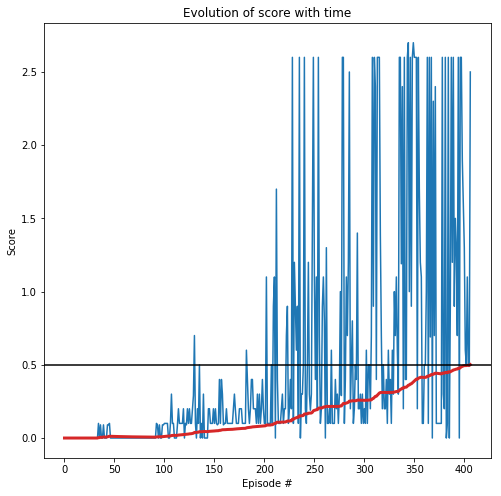

In [28]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, 'tab:blue')
plt.plot(np.arange(len(scores_avg)), scores_avg, 'tab:red', linewidth=3)

plt.axhline(y=0.5, color="Black")

plt.title('Evolution of score with time')
plt.xlabel('Episode #')
plt.ylabel('Score')
plt.show()

# Conclusions and future improvements

In this project I have implemented a DDPG algorithm to solve the Unity Tennis Environment with two playing agents.

The performance is as follows:

 - 407 episodes are required to solve the problem, when the average score of the last 100 episodes has reached 0.5.

After initially starting to solve the environment, with very high number of episodes, I have choosen to instead to implement a number of learning passes at each step of the agent. Therefore, even with smaller number of positive samples, the network can learn several time from it. I believe, that this is essential to speed up convergence, as otherwise more time is spent inside each episode playing.

Furthermore, I found otu that it is very helpful in traning if the agent makes some small positive samples by chance at the beginning (i.e. episodes of 0.1 reward), because otherwise the whole experience replay buffer is only filled with unsuccessful episodes. Therefore, I restarted the training several times to get some "lucky" initial positive rewards.

Training is generally slower at later episodes, because the agents simply learn to play for longer time and keep the ball in the air for longer.

The environment was solved with a simple version of the Deep Deterministic Policy Gradient Algorithm. Also the architecture of the neural network contained a simple size of 128 to 256 neurons. I found during training that networks with larger numbers of neurons (i.e. > 1024) do not perform well at all in this task. The simpler the easier approach seems to work well.

In the future, it would very well be worthwhile to try some of the following improvements and algorithmic choices:

At first, it might be worthwhile to try the RainBow https://arxiv.org/abs/1710.02298 implementation of DeepMind, which combines even more improvements for Deep Reinforcement Learning. Also in my first project "navigation" I have used the prioritized experience replay buffer of: https://arxiv.org/abs/1511.05952 together with a weighted mean squared error loss functions.

Secondly, it is suggested to tryout the possible algorithms: DQN, C51, A2C, QR-DQN, PPO, OC, TD3, etc. A good overview of these possible implementations is given by Shangtong Zhang: https://github.com/ShangtongZhang/DeepRL

Of course, at last, a complete study of exploration of the hyperparameter space is necessary, which would lead to some questions like this: How many layers perform best? How many neurons? Which activation functions? Linear or exponential epsilon decay? How to choose the discount factor for reward?

We have included a helper function (Stochastic noise process), which can also be subject to further studies, such as varying its hyperparameters. Actually, I found it helpful to decay the noise with time

More ideas:

 - Port the algorithm into C++...
 - Run the training on Nvidia Jetson...
 - Try PPO algorithm...